MovieWriter ffmpeg unavailable; using Pillow instead.


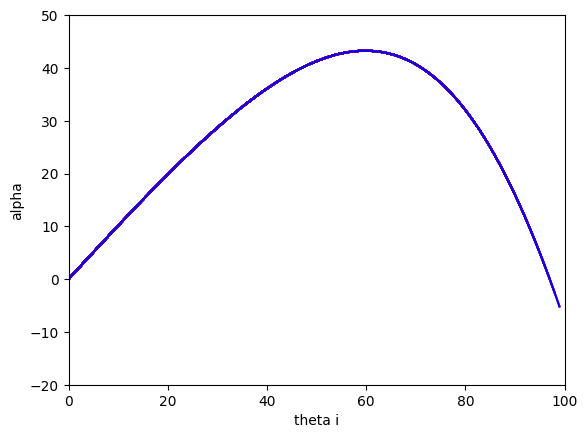

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def get_alpha(theta_i, n):
    theta_r_red = np.arcsin(np.sin(theta_i /180.0 * np.pi)/n) * 180.0/np.pi
    return 4 * theta_r_red - 2 * theta_i

theta_i = np.linspace(0, 100, 100)
# alpha = 4 theta_r - theta_i
# sin(theta_i) = n sin(theta_r)
alpha_red = get_alpha(theta_i, 1.325)
alpha_blue = get_alpha(theta_i, 1.340)


fig, ax = plt.subplots()
plt.xlabel('theta i')
plt.ylabel('alpha')
plt.xlim([0, 100])
plt.ylim([-20, 50])

def update(num, theta_i, alpha_red, alpha_blue):
    line_red, = ax.plot(theta_i[:num], alpha_red[:num], color='red')
    line_blue, = ax.plot(theta_i[:num], alpha_blue[:num], color='blue')

    return line_red, line_blue
    

ani = animation.FuncAnimation(fig, update, len(theta_i), fargs=[theta_i, alpha_red, alpha_blue],
                              interval=25, blit=True)
ani.save('/windir/c/Users/debor/Documents/test.gif')
plt.show()

#@@@ add another box with the circle in 
#@@@ add another plot with the blue line 
